In [34]:
# Implementation of Q-Learning to solve Gymnasium's MountainCar environment

import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

In [28]:
N_EPISODES = 5000
N_TEST_EPISODES = 100
MAX_STEPS = 500
ALPHA = 0.35
GAMMA = 0.99
EPSILON_MAX = 0.9
EPSILON_DECAY = 0.9995
EPSILON_MIN = 0.01
WINDOW = 100

In [24]:
# Create environment
env = gym.make("MountainCar-v0", max_episode_steps=MAX_STEPS)
OBS_SPACE_LOW = env.observation_space.low
OBS_SPACE_HIGH = env.observation_space.high
N_ACTIONS = env.action_space.n

In [25]:
# Discretization
N_BINS = (25, 20)
OBS_SPACE = [np.linspace(OBS_SPACE_LOW[0], OBS_SPACE_HIGH[0], N_BINS[0]), np.linspace(OBS_SPACE_LOW[1], OBS_SPACE_HIGH[1], N_BINS[1])]

In [26]:
def discretize(obs):
    state_index = []
    for i in range(len(obs)):
        state_index.append(np.digitize(obs[i], OBS_SPACE[i]) - 1)
    return tuple(state_index)

In [ ]:
# Initialize performance metrics
total_rewards = []
success_count = 0

# Initialize Q-table
Q = np.random.uniform(low=-1, high=1, size=(N_BINS[0], N_BINS[1], N_ACTIONS))

epsilon = EPSILON_MAX
success_rate = 0

for episode in range(N_EPISODES):
    state, info = env.reset()
    state = discretize(state)

    total_reward = 0

    for step in range(MAX_STEPS):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()# Random action
        else:
            action = np.argmax(Q[state])# Greedy action

        # Take action
        next_state, reward, success, truncated, info = env.step(action)
        next_state = discretize(next_state)

        # Update Q-value
        best_next_action = np.argmax(Q[next_state])
        td_target = reward + GAMMA * Q[next_state][best_next_action]
        Q[state][action] += ALPHA * (td_target - Q[state][action])

        # Update state and total reward
        state = next_state
        total_reward += reward

        if success or truncated:
            break

    # Update epsilon
    epsilon = max(epsilon * EPSILON_DECAY, EPSILON_MIN)
    total_rewards.append(total_reward)

    if success:
        success_count += 1

    # Print results
    if (episode + 1) % WINDOW == 0:
        success_rate = 100 * success_count / WINDOW
        success_count = 0
        print(f'Episode {episode + 1}: Total reward: {int(total_reward)}, Success: {success}, Epsilon: {epsilon:.4f}, Success rate: {success_rate:.2f}%')

Episode 100: Total reward: -500, Success: False, Epsilon: 0.8561, Success rate: 0.0%
Episode 200: Total reward: -500, Success: False, Epsilon: 0.8143, Success rate: 0.0%
Episode 300: Total reward: -500, Success: False, Epsilon: 0.7746, Success rate: 0.0%
Episode 400: Total reward: -500, Success: False, Epsilon: 0.7368, Success rate: 0.0%
Episode 500: Total reward: -500, Success: False, Epsilon: 0.7009, Success rate: 4.0%
Episode 600: Total reward: -500, Success: False, Epsilon: 0.6667, Success rate: 4.0%
Episode 700: Total reward: -500, Success: False, Epsilon: 0.6342, Success rate: 8.0%
Episode 800: Total reward: -500, Success: False, Epsilon: 0.6032, Success rate: 8.0%
Episode 900: Total reward: -378, Success: True, Epsilon: 0.5738, Success rate: 11.0%
Episode 1000: Total reward: -500, Success: False, Epsilon: 0.5458, Success rate: 24.0%
Episode 1100: Total reward: -500, Success: False, Epsilon: 0.5192, Success rate: 17.0%
Episode 1200: Total reward: -353, Success: True, Epsilon: 0.4

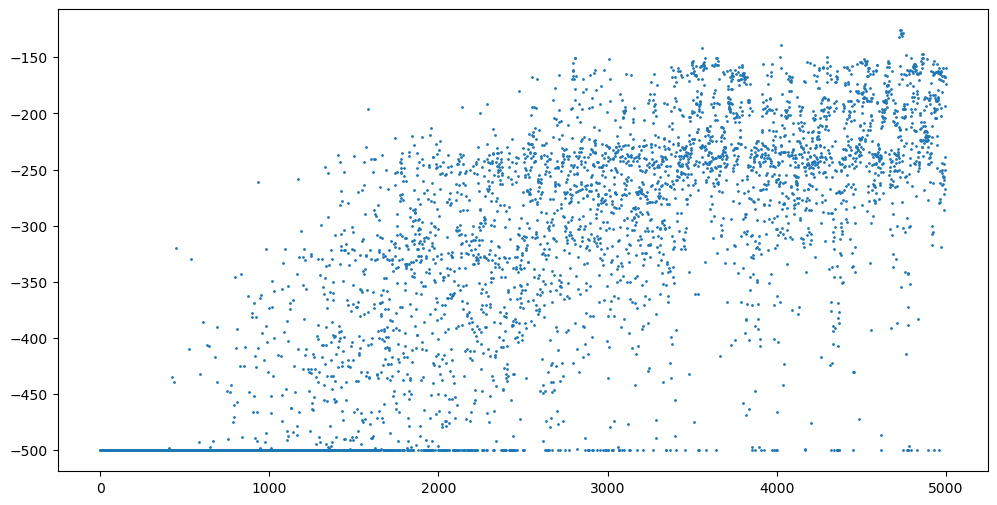

In [37]:
# Plot the total rewards over the training episodes as a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(range(len(total_rewards)), total_rewards, s=1)

In [29]:
# Initialize performance metrics
rewards = []
test_success_count = 0

for episode in range(N_TEST_EPISODES):
    state, info = env.reset()
    state = discretize(state)

    total_reward = 0

    for step in range(MAX_STEPS):
        # Use the greedy policy (no exploration)
        action = np.argmax(Q[state])

        # Take action
        next_obs, reward, success, truncated, info = env.step(action)
        next_state = discretize(next_obs)

        # Update state and total reward
        state = next_state
        total_reward += reward

        if success or truncated:
            break

    rewards.append(total_reward)

    if success:
        test_success_count += 1

# Performance metrics for testing phase
average_reward = np.mean(rewards)
test_success_rate = 100 * test_success_count / N_TEST_EPISODES
min_test_reward = np.min(rewards)
max_test_reward = np.max(rewards)

print(f'\nTesting Performance Metrics:')
print(f'Average Total Reward: {average_reward:.2f}')
print(f'Minimum Reward: {int(min_test_reward)}')
print(f'Maximum Reward: {int(max_test_reward)}')
print(f'Success Rate: {test_success_rate:.2f}% ({test_success_count}/{N_TEST_EPISODES})')



Testing Performance Metrics:
Average Total Reward: -162.90
Minimum Reward: -229
Maximum Reward: -152
Success Rate: 100.00% (100/100)


In [32]:
# Human render mode test
# Create the environment in human render mode
env = gym.make("MountainCar-v0", render_mode="human")

state, _ = env.reset()
state = discretize(state)
done = False
total_reward = 0

while not done:
    action = np.argmax(Q[state])
    state, reward, success, truncated, _ = env.step(action)
    done = success or truncated
    state = discretize(state)
    total_reward += reward

print(f"Test episode reward: {total_reward}")
env.close()


Test episode reward: -156.0
